In [52]:
fnames=[r".\PPM_NO_RESET\CRB_ppmSweep_Start0_NoReset_FFE_TP4_fromREC_10ppm_0.2.15_.csv" \
        ,r".\PPM_NO_RESET\CRB_ppmSweep_Start0_NoReset_FFE_TP4_fromREF_10ppm_0.2.15_.csv" 
        ,r".\PPM_NO_RESET\CRB_ppmSweep_Start0_NoReset_FFE_TP4_fromREC_10ppm_0.3.0_.csv" 
        ,r".\PPM_NO_RESET\CRB_ppmSweep_Start0_NoReset_FFE_TP4_fromREF_10ppm_0.3.0_.csv" 
        ]

fw=['0.2.15','0.2.15','0.3.0','0.3.0']
TP4_REF=['TP3','REF','TP3','REF']

fname_out=r".\PPM_NO_RESET\Out.png"


In [53]:
import matplotlib.mlab as ml
from mpl_toolkits.mplot3d import Axes3D


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


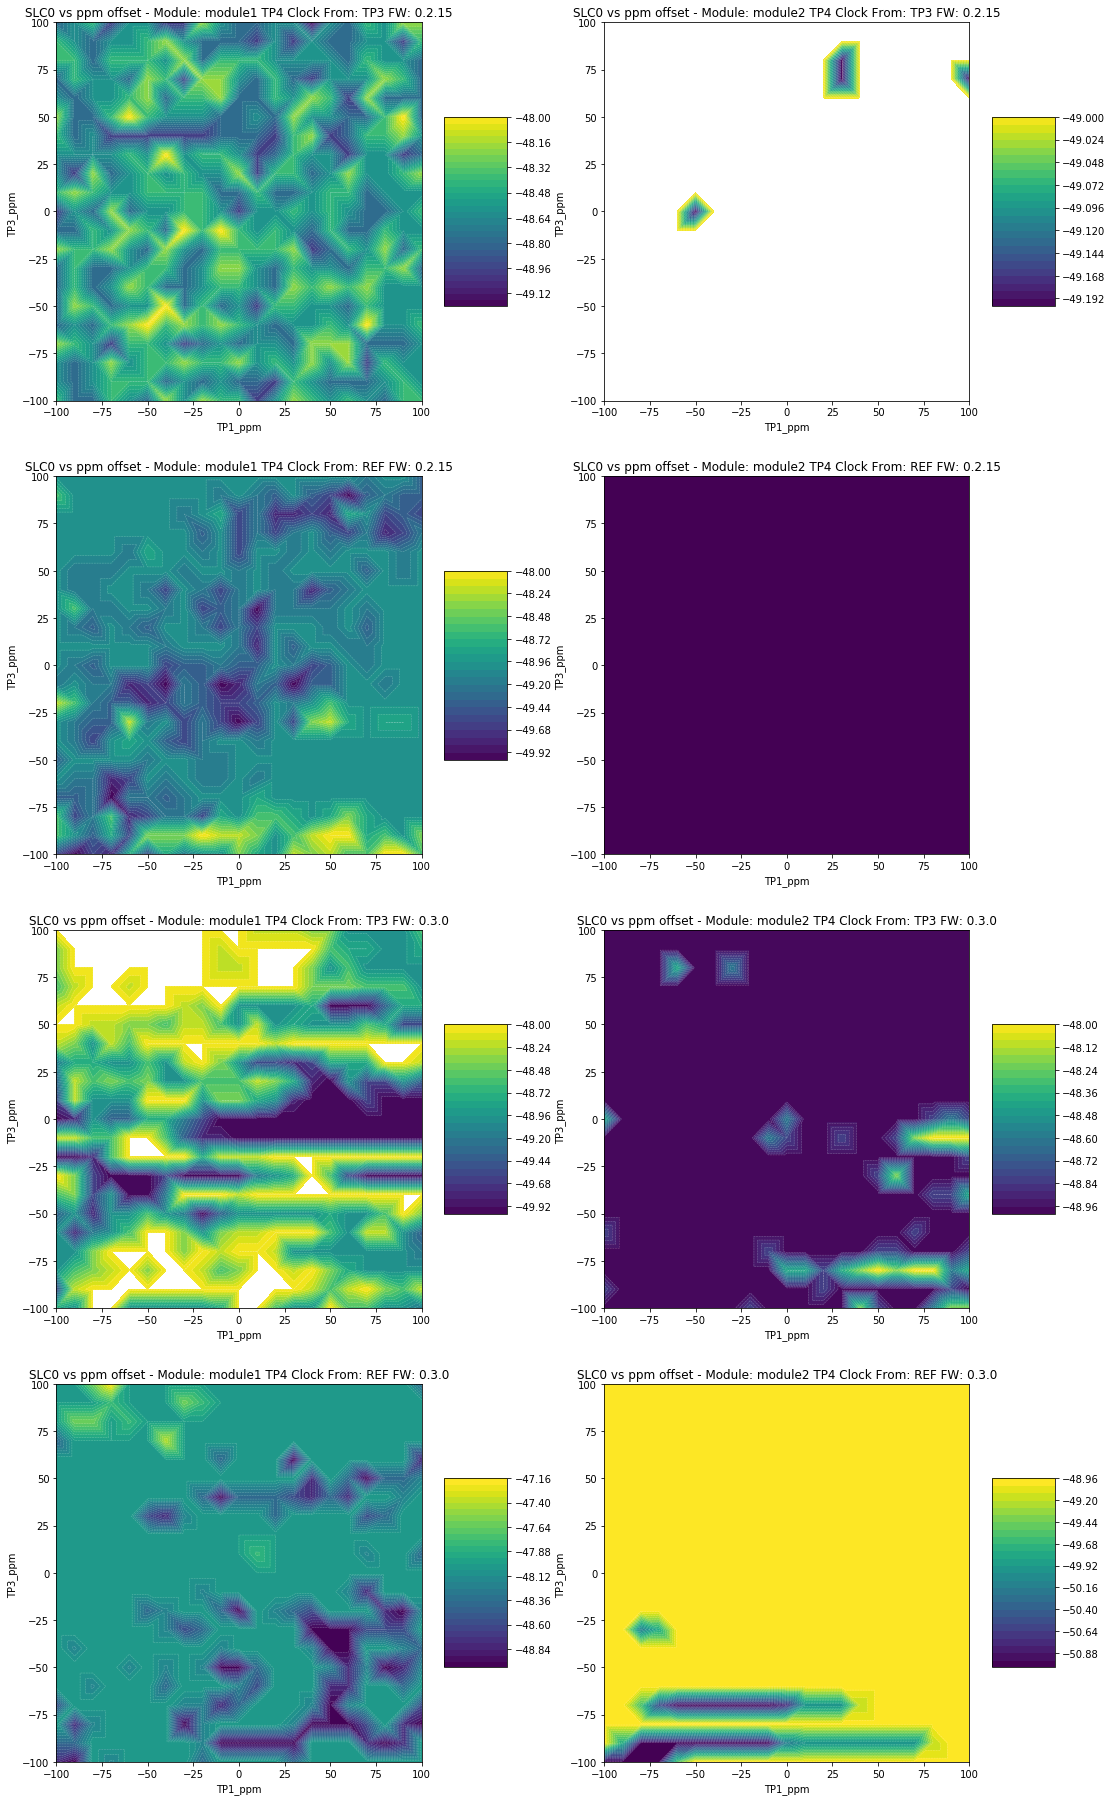

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


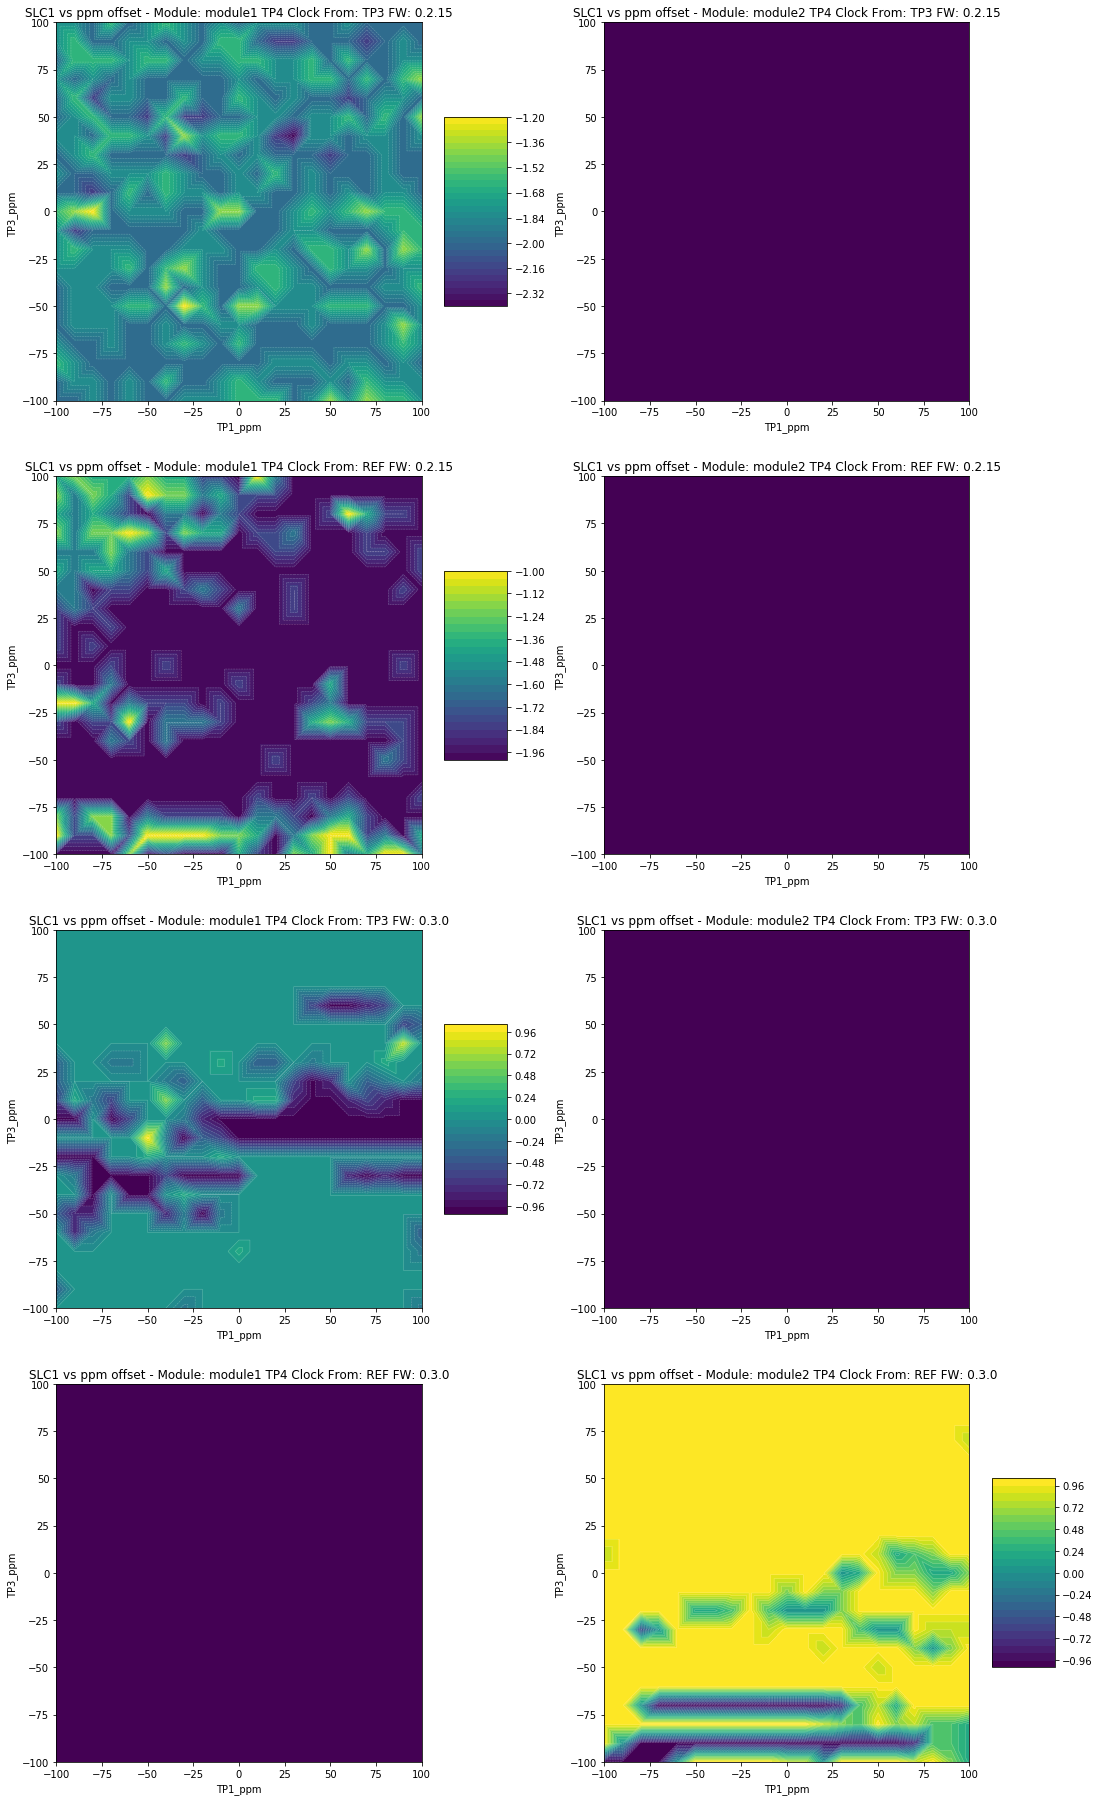

posx and posy should be finite values
posx and posy should be finite values


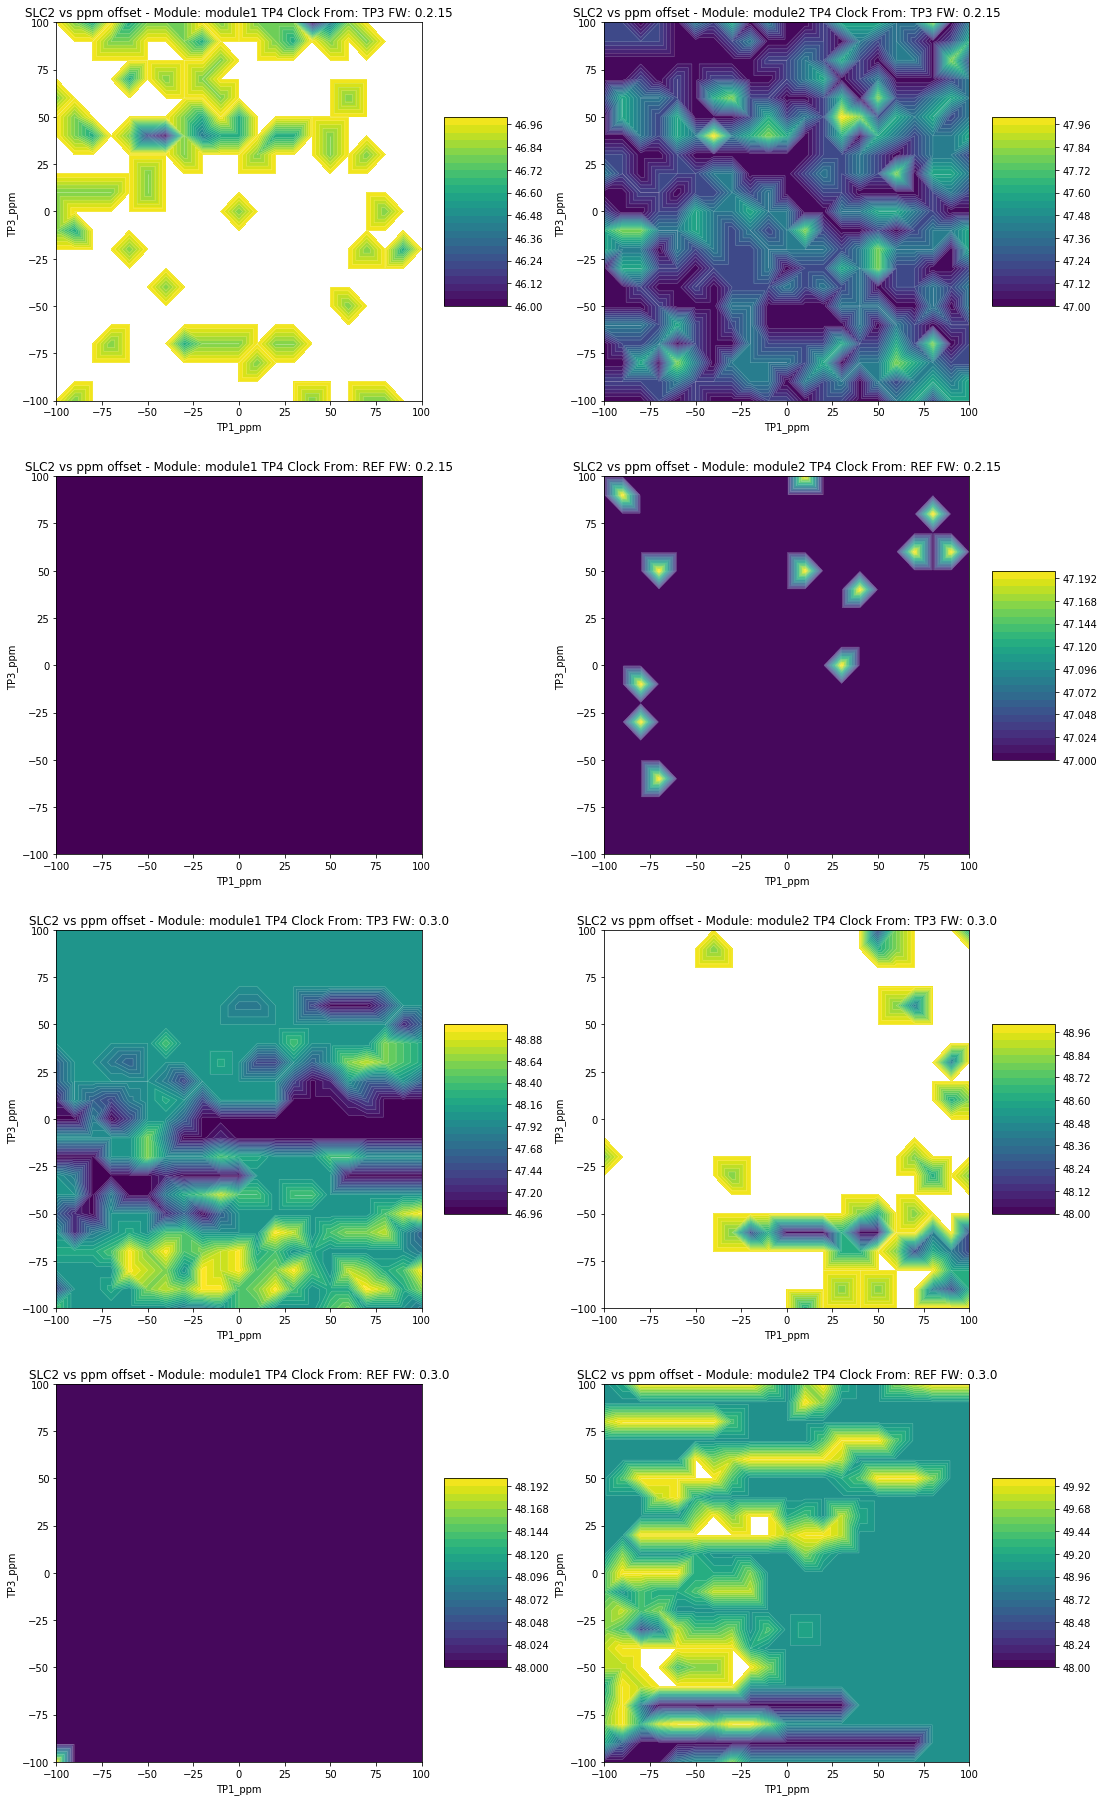

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as ml


def PlotPPM(parameter='ber', fname_out=fname_out):
    datasets=[]

    count=0
    for fname in fnames:
        DATA=pd.read_csv(fname, index_col=False)
        dataset = DATA
        dataset['FW']=fw[count]
        dataset['TP4_REF']=TP4_REF[count]
        dataset['TP1_ppm'] = np.where(dataset['module'] == 'module1', dataset['ppm2'], dataset['ppm1'])
        dataset['TP3_ppm'] = np.where(dataset['module'] == 'module2', dataset['ppm2'], dataset['ppm1'])

        #Index(['module', 'ppm1', 'ppm2', 'relink', 'sample', 'TP3_Lol', 'PATT',
        #       'ADC_POWER', 'errCnt', 'bitCnt', 'locked', 'ber', 'UCW', 'SNR_A0',
        #       'SNR_A1', 'SNR_A2', 'SNR_A3', 'SNR_B0', 'SNR_B1', 'SNR_B2', 'SK0',
        #       'SK1', 'SK2', 'SK3', 'EGR0', 'EGR1', 'EGR2', 'EGR3', 'IGR0', 'IGR1',
        #       'IGR2', 'IGR3', 'FFE_T0', 'FFE_T1', 'FFE_T2', 'FFE_T3', 'FFE_T4',
        #       'FFE_T5', 'FFE_T6', 'FFE_T7', 'FFE_T8', 'FFE_T9', 'FFE_T10', 'FFE_T11',
        #       'FFE_T12', 'FFE_T13', 'FFE_T14', 'FFE_T15SLC0', 'SLC1', 'SLC2',
        #       'Unnamed: 50', 'FW', 'TP4_REF', 'TP1_ppm', 'TP3_ppm'],
        #      dtype='object')

        #datasets.append(dataset1)

        datasets.append(DATA)
        count+=1

    z_max=0
    for dataset in datasets:
        z_max=max(z_max,dataset[parameter].max())

    fig = plt.figure(figsize=(18,32))
    plt.tight_layout()

    modules=['module1','module2']
    count=0
    for DATA in datasets:
        dataset=DATA.groupby(['module','TP1_ppm','TP3_ppm'])[parameter].mean().reset_index()

        for module in modules:
            x = dataset[dataset['module']==module]['TP1_ppm']
            y = dataset[dataset['module']==module]['TP3_ppm']
            z = dataset[dataset['module']==module][parameter]

            ax = fig.add_subplot(len(datasets),2,count*2+modules.index(module)+1)

            ax.tricontour(x, y, z, 30, linewidths=0.5, colors='w', alpha=.3)
            surf=ax.tricontourf(x, y, z, 30, norm=plt.Normalize(vmin=z.min(), vmax=z.max()))
            cbar=plt.colorbar(surf,shrink=.5, aspect=3,)
            #ax.plot(x, y, 'ko', ms=3)

            ax.set_title(parameter + ' vs ppm offset - Module: '+ module + ' TP4 Clock From: ' + TP4_REF[count] + ' FW: ' + fw[count])
            #TP4_REF=['TP3','REF','TP3','REF']

            ax.set_xlabel('TP1_ppm')
            ax.set_ylabel('TP3_ppm ')
        count+=1

    plt.savefig(fname_out)
    
#PlotPPM(parameter='ber', fname_out=r".\PPM_NO_RESET\BERvsPPM.png")
#PlotPPM(parameter='ADC_POWER', fname_out=r".\PPM_NO_RESET\POWERvsPPM.png")
#PlotPPM(parameter='SNR_B0', fname_out=r".\PPM_NO_RESET\SNR_B0vsPPM.png")
#PlotPPM(parameter='SNR_B1', fname_out=r".\PPM_NO_RESET\SNR_B1vsPPM.png")
#PlotPPM(parameter='SNR_B2', fname_out=r".\PPM_NO_RESET\SNR_B2vsPPM.png")
#PlotPPM(parameter='SK0', fname_out=r".\PPM_NO_RESET\SK0vsPPM.png")
#PlotPPM(parameter='SK1', fname_out=r".\PPM_NO_RESET\SK1vsPPM.png")
#PlotPPM(parameter='SK2', fname_out=r".\PPM_NO_RESET\SK2vsPPM.png")
#PlotPPM(parameter='SK3', fname_out=r".\PPM_NO_RESET\SK3vsPPM.png")
PlotPPM(parameter='SLC0', fname_out=r".\PPM_NO_RESET\SLC0vsPPM.png")
PlotPPM(parameter='SLC1', fname_out=r".\PPM_NO_RESET\SLC1vsPPM.png")
PlotPPM(parameter='SLC2', fname_out=r".\PPM_NO_RESET\SLC2vsPPM.png")

#SLC1